<a href="https://colab.research.google.com/github/MEGHANASEEPANA/Datalabsteam-4/blob/jeswanth/rf_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/MEGHANASEEPANA/Datalabsteam-4.git

Cloning into 'Datalabsteam-4'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 67 (delta 35), reused 7 (delta 0), pack-reused 0
Receiving objects: 100% (67/67), 4.47 MiB | 12.50 MiB/s, done.
Resolving deltas: 100% (35/35), done.


#Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#Loading Data

In [4]:
data=pd.read_csv("/content/Datalabsteam-4/train.csv/train.csv")

In [5]:
df=pd.DataFrame(data)

In [6]:
df.shape

(59381, 128)

In [7]:
df.head(3)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


#Description of Data

Id:	                A unique identifier associated with an application.

Product_Info_1-7	: A set of normalized variables relating to the product applied for

Ins_Age	:           Normalized age of applicant

Ht	:               Normalized height of applicant

Wt	:               Normalized weight of applicant

BMI	:               Normalized BMI of applicant

Employment_Info_1-6	: A set of normalized variables relating to the employment history of the applicant.

InsuredInfo_1-6	:    A set of normalized variables providing information about the applicant.

Insurance_History_1-9	: A set of normalized variables relating to the insurance history of the applicant.

Family_Hist_1-5	: A set of normalized variables relating to the family history of the applicant.

Medical_History_1-41	: A set of normalized variables relating to the medical history of the applicant.

Medical_Keyword_1-48	: A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.

Response	:         This is the target variable, an ordinal variable relating to the final decision associated with an application

In [8]:
data_types_dict = {column: df[column].dtype for column in df.columns}
print(data_types_dict)

{'Id': dtype('int64'), 'Product_Info_1': dtype('int64'), 'Product_Info_2': dtype('O'), 'Product_Info_3': dtype('int64'), 'Product_Info_4': dtype('float64'), 'Product_Info_5': dtype('int64'), 'Product_Info_6': dtype('int64'), 'Product_Info_7': dtype('int64'), 'Ins_Age': dtype('float64'), 'Ht': dtype('float64'), 'Wt': dtype('float64'), 'BMI': dtype('float64'), 'Employment_Info_1': dtype('float64'), 'Employment_Info_2': dtype('int64'), 'Employment_Info_3': dtype('int64'), 'Employment_Info_4': dtype('float64'), 'Employment_Info_5': dtype('int64'), 'Employment_Info_6': dtype('float64'), 'InsuredInfo_1': dtype('int64'), 'InsuredInfo_2': dtype('int64'), 'InsuredInfo_3': dtype('int64'), 'InsuredInfo_4': dtype('int64'), 'InsuredInfo_5': dtype('int64'), 'InsuredInfo_6': dtype('int64'), 'InsuredInfo_7': dtype('int64'), 'Insurance_History_1': dtype('int64'), 'Insurance_History_2': dtype('int64'), 'Insurance_History_3': dtype('int64'), 'Insurance_History_4': dtype('int64'), 'Insurance_History_5': d

#Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


Ignoring the index

In [10]:
df["Id"].duplicated().sum()

0

In [11]:
df['Id']=df.index+1
df.drop('Id',axis=1,inplace=True)

In [12]:
df.head(3)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [13]:
df.describe(include='all')

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#Handling Missing Values

In [14]:
df.isnull().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_3 

In [15]:
null_col=df.isnull().sum()
columns_with_null = null_col[null_col > 0].index
description = df[columns_with_null].describe()

In [16]:
print(description)

       Employment_Info_1  Employment_Info_4  Employment_Info_6  \
count       59362.000000       52602.000000       48527.000000   
mean            0.077582           0.006283           0.361469   
std             0.082347           0.032816           0.349551   
min             0.000000           0.000000           0.000000   
25%             0.035000           0.000000           0.060000   
50%             0.060000           0.000000           0.250000   
75%             0.100000           0.000000           0.550000   
max             1.000000           1.000000           1.000000   

       Insurance_History_5  Family_Hist_2  Family_Hist_3  Family_Hist_4  \
count         33985.000000   30725.000000   25140.000000   40197.000000   
mean              0.001733       0.474550       0.497737       0.444890   
std               0.007338       0.154959       0.140187       0.163012   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000400    

In [17]:
percentage_null = (null_col / len(df)) * 100
percentage_null = percentage_null[columns_with_null]
percentage_null.name = 'Percentage of Null Values'
print(percentage_null)

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_3          57.663226
Family_Hist_4          32.306630
Family_Hist_5          70.411411
Medical_History_1      14.969435
Medical_History_10     99.061990
Medical_History_15     75.101463
Medical_History_24     93.598963
Medical_History_32     98.135767
Name: Percentage of Null Values, dtype: float64


In [18]:
#dropping columns with more than 40% missing values
threshold = 0.4 * len(df)
non_col = df.columns[df.isnull().sum() > threshold]
df.drop(non_col, axis=1, inplace=True)
print(non_col)

Index(['Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_5', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'],
      dtype='object')


##handling rest missing values

In [19]:
null_col=df.isnull().sum()
cols_to_impute = null_col[null_col > 0].index
description = df[cols_to_impute].describe()

In [20]:
print(description)

       Employment_Info_1  Employment_Info_4  Employment_Info_6  Family_Hist_4  \
count       59362.000000       52602.000000       48527.000000   40197.000000   
mean            0.077582           0.006283           0.361469       0.444890   
std             0.082347           0.032816           0.349551       0.163012   
min             0.000000           0.000000           0.000000       0.000000   
25%             0.035000           0.000000           0.060000       0.323944   
50%             0.060000           0.000000           0.250000       0.422535   
75%             0.100000           0.000000           0.550000       0.563380   
max             1.000000           1.000000           1.000000       0.943662   

       Medical_History_1  
count       50492.000000  
mean            7.962172  
std            13.027697  
min             0.000000  
25%             2.000000  
50%             4.000000  
75%             9.000000  
max           240.000000  


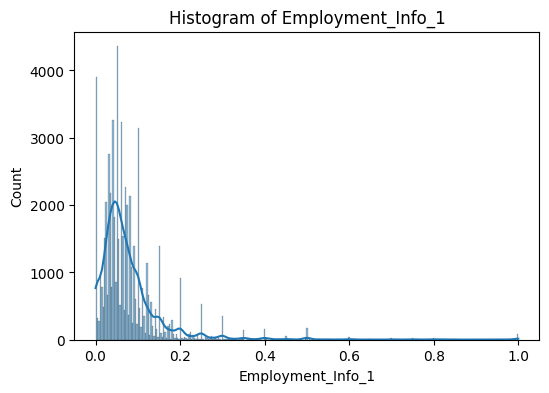

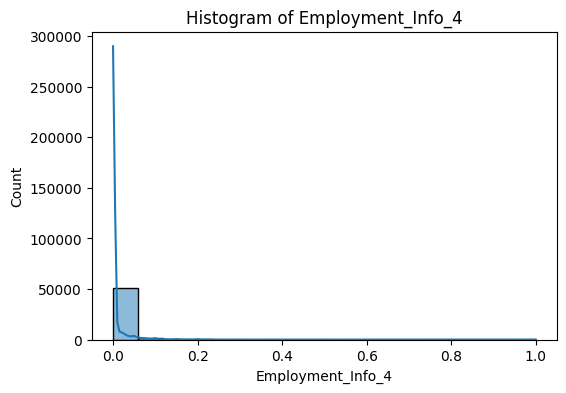

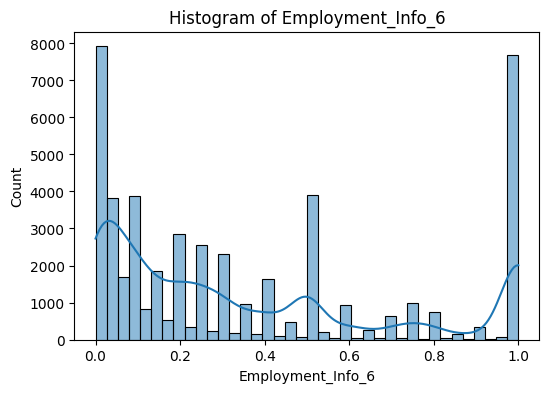

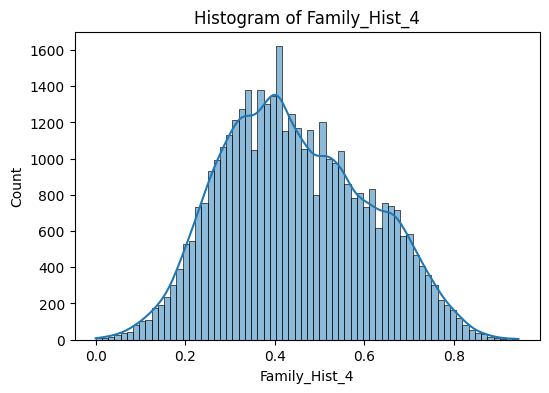

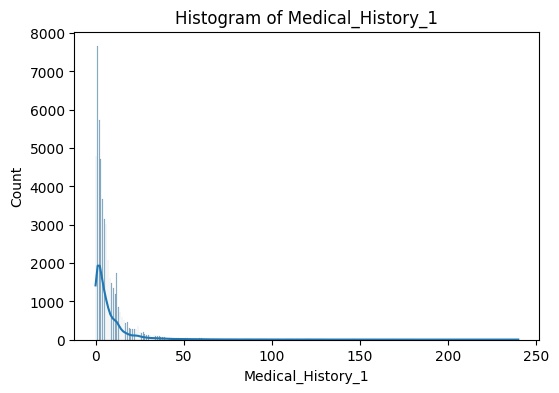

In [21]:
req_cols=['Employment_Info_1','Employment_Info_4','Employment_Info_6','Family_Hist_4','Medical_History_1']
for column in req_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.show()

In [22]:
df[['Employment_Info_6','Family_Hist_4']]=df[['Employment_Info_6','Family_Hist_4']].fillna(df[['Employment_Info_6','Family_Hist_4']].mean())

In [23]:
#since they are Distributive Functions(Continuous variable),
#graph is right-skewed,
#we use median
df[req_cols]=df[req_cols].fillna(df[req_cols].median())
df.isnull().sum()

Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0
Medical_History_6      0
Medical_History_7      0


In [24]:
df.isnull().sum()

Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0
Medical_History_6      0
Medical_History_7      0


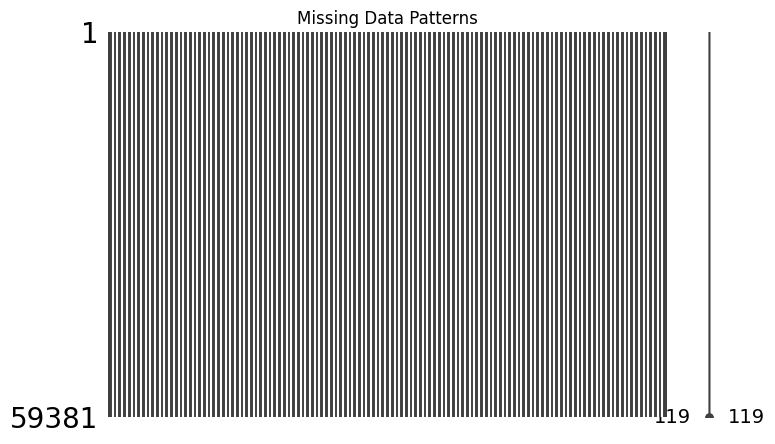

In [26]:
import missingno as msno
msno.matrix(df, figsize=(8, 5))  # Blue color for missing values
plt.title('Missing Data Patterns')
plt.show()

#distribution of the target variable

<Axes: xlabel='Response', ylabel='count'>

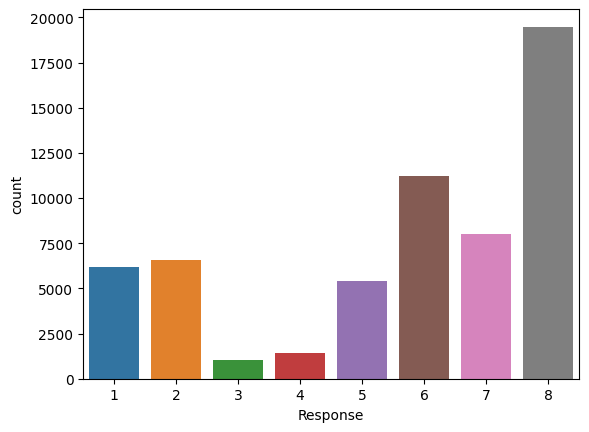

In [27]:
sns.countplot(x=df['Response'])


In [28]:
print(df['Response'].value_counts())

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


In [29]:
df['Modified_Response']  = df['Response'].apply(lambda x : 1 if x<=5 and x>=0 else (2 if x<=7 else 3))

<Axes: xlabel='Modified_Response', ylabel='count'>

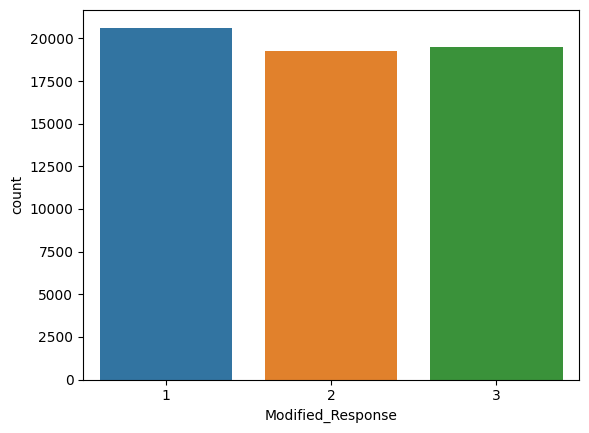

In [30]:
sns.countplot(x=df['Modified_Response'])

#Feature Engineering

### categorizing variables
**The following variables are continuous:**

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

**The following variables are discrete:**

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are **dummy variables.**

rest are categorical(**nominal variables**)




#Feature Variables

##Label Encoding Product_Info_2

In [31]:
Lab=LabelEncoder()
df['Product_Info_2']=Lab.fit_transform(df['Product_Info_2'])
df['Product_Info_2']+=1

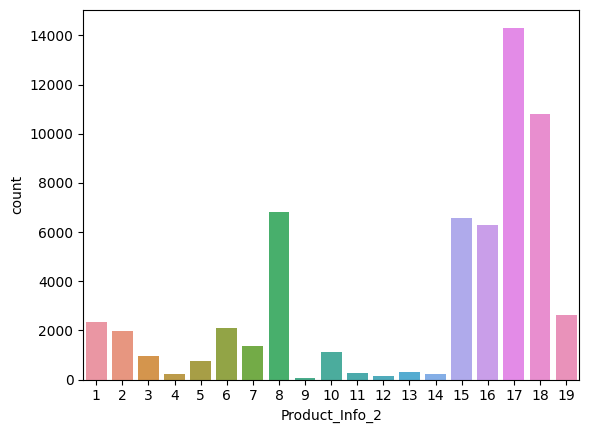

In [32]:
sns.countplot(x='Product_Info_2', data=df)
plt.show()

#SPLitting the data

In [52]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.6 MB/s eta 0:00:00


In [53]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5e49127d5a764b07faa090f32849e934850e5344dcded2f9d5641f59a1d4e7c7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [54]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
from mlxtend.classifier import StackingClassifier
import missingno as msno
from sklearn.ensemble import VotingClassifier
import shap
shap.initjs()
import lime
from lime import lime_tabular
warnings.simplefilter('ignore')
import os

In [58]:
# Data for all the independent variables
X = df.drop(labels=['Modified_Response','Response'],axis=1)

# Data for the dependent variable
Y = df['Response']

In [59]:
X.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,17,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,19,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,18,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,16,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

#ANOTHER METHOD

In [61]:
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)

  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds)


  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log



In [62]:

def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_

  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)

  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [63]:


def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model

In [64]:

# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')


  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)


In [65]:

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))

  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values


  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

In [66]:
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, Y_train)


{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.6s


In [ ]:
# Best parameters are:
# {'max_depth': 4,
#  'min_samples_leaf': 40,
#  'min_samples_split': 50,
#  'n_estimators': 50}

In [69]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.4189541933310879
The accuracy on test dataset is 0.4112991496169066

Train confusion matrix:
[[  293   250     0     0   149  1663    24  2548]
 [  140   405     0     0   199  1904    16  2562]
 [   10     5     0     0    59   368     0   377]
 [    0     0     0     0     0   204     0   941]
 [   51    99     0     0   503  1526     5  2126]
 [   57    74     0     0     0  3344    21  5531]
 [    5     0     0     0     0  1536    66  4812]
 [    0     0     0     0     0   336     4 15291]]

Test confusion matrix:
[[  68   76    0    0   40  438   10  648]
 [  32   94    0    0   55  476    5  664]
 [   3    3    0    0   14   82    0   92]
 [   1    0    0    0    0   52    0  230]
 [  29   23    0    0  126  411    0  533]
 [   8   21    0    0    0  810    9 1358]
 [   4    0    0    0    0  363   14 1227]
 [   0    0    0    0    0   84    1 3773]]



ValueError: ignored

In [71]:
check_importance(rf_optimal_model, X_train)

,Feature,Feature Importance
9,Wt,0.21
10,BMI,0.17
36,Medical_History_4,0.10
84,Medical_Keyword_15,0.08
3,Product_Info_4,0.08
53,Medical_History_23,0.08
7,Ins_Age,0.05
72,Medical_Keyword_3,0.03
8,Ht,0.03
67,Medical_History_39,0.02


In [78]:
type(check_importance(rf_optimal_model, X_train))

pandas.core.frame.DataFrame

In [81]:
df_imp=check_importance(rf_optimal_model, X_train)

In [ ]:
filtered_rows = df_imp[df_imp['Feature Importance']>0.00]


In [92]:

# Get the values in col2 as a list
imp_cols = filtered_rows['Feature'].tolist()

print(imp_cols)
imp_cols.append('Response')

['Wt', 'BMI', 'Medical_History_4', 'Medical_Keyword_15', 'Product_Info_4', 'Medical_History_23', 'Ins_Age', 'Medical_Keyword_3', 'Ht', 'Medical_History_39', 'Family_Hist_4', 'InsuredInfo_6', 'Medical_History_1', 'Medical_History_30', 'Medical_History_16', 'Product_Info_2', 'Medical_History_33', 'Family_Hist_1', 'Medical_Keyword_48', 'Employment_Info_3', 'Employment_Info_2']


In [93]:
df_imp=df[imp_cols]

In [94]:
df_imp.head()

,Wt,BMI,Medical_History_4,Medical_Keyword_15,Product_Info_4,Medical_History_23,Ins_Age,Medical_Keyword_3,Ht,Medical_History_39,Family_Hist_4,InsuredInfo_6,Medical_History_1,Medical_History_30,Medical_History_16,Product_Info_2,Medical_History_33,Family_Hist_1,Medical_Keyword_48,Employment_Info_3,Employment_Info_2,Response
0,0.148536,0.323008,1,0,0.076923,3,0.641791,0,0.581818,3,0.444890,2,4.0,2,3,17,1,2,0,1,12,8
1,0.131799,0.272288,1,0,0.076923,3,0.059701,0,0.600000,3,0.084507,2,5.0,2,1,1,3,2,0,3,1,4
2,0.288703,0.428780,2,0,0.076923,3,0.029851,0,0.745455,3,0.225352,1,10.0,2,1,19,3,3,0,1,9,8
3,0.205021,0.352438,2,0,0.487179,3,0.164179,0,0.672727,3,0.352113,2,0.0,2,1,18,3,3,0,1,9,8
4,0.234310,0.424046,2,0,0.230769,3,0.417910,0,0.654545,3,0.408451,2,4.0,2,1,16,3,2,0,1,9,8


#MOdel Training

In [97]:
X=df_imp.drop('Response',axis=1)
Y=df_imp['Response']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

In [101]:
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(rf_classifier, rf_parameters, cv=5)  # You may adjust cv (number of cross-validation folds)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best model
rf_optimal_model = grid_search.best_estimator_


In [102]:
y_pred = rf_optimal_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
class_report = classification_report(Y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.5102
Classification Report:
               precision    recall  f1-score   support

           1       0.32      0.07      0.11      1280
           2       0.42      0.22      0.29      1326
           3       0.00      0.00      0.00       194
           4       0.00      0.00      0.00       283
           5       0.54      0.51      0.53      1122
           6       0.38      0.50      0.44      2206
           7       0.42      0.31      0.36      1608
           8       0.61      0.91      0.73      3858

    accuracy                           0.51     11877
   macro avg       0.34      0.32      0.31     11877
weighted avg       0.46      0.51      0.46     11877



In [100]:
Y_pred=rf_optimal_model.predict(Y_test)

ValueError: ignored

In [99]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )

The accuracy on train dataset is 0.46423459077130347
The accuracy on test dataset is 0.4567651763913446

Train confusion matrix:
[[  214   539     0     0   270  1507   449  1948]
 [  128   819     0     0   389  1624   363  1903]
 [    8    20     0     0   109   417    23   242]
 [    0     1     0     0     0   325    43   776]
 [   55   301     0     0   858  1473   102  1521]
 [   83   226     0     0     8  3939   624  4147]
 [    0     7     0     0     1  1448  1437  3526]
 [    0     0     0     0     1   692   152 14786]]

Test confusion matrix:
[[  40  169    0    0   83  375  144  469]
 [  33  203    0    0   93  406   90  501]
 [   4    5    0    0   30   92    5   58]
 [   0    0    0    0    0   94    9  180]
 [  23   81    0    0  214  410   30  364]
 [  15   65    0    0    3  960  151 1012]
 [   0    2    0    0    0  350  356  900]
 [   0    0    0    0    0  173   33 3652]]



ValueError: ignored

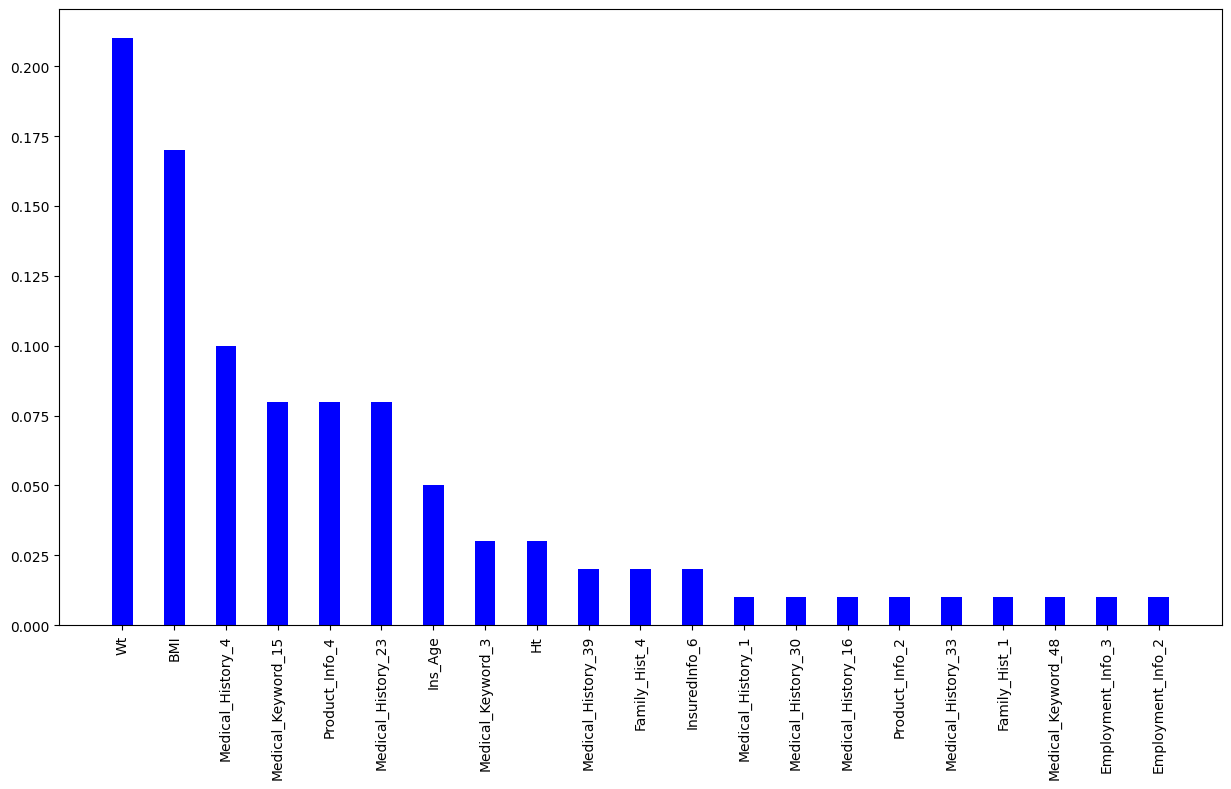

In [72]:
plot_feature_importance(rf_optimal_model, X_train)

In [74]:
# Interpretting the model using lime
interpret_with_lime(rf_optimal_model,X_test)

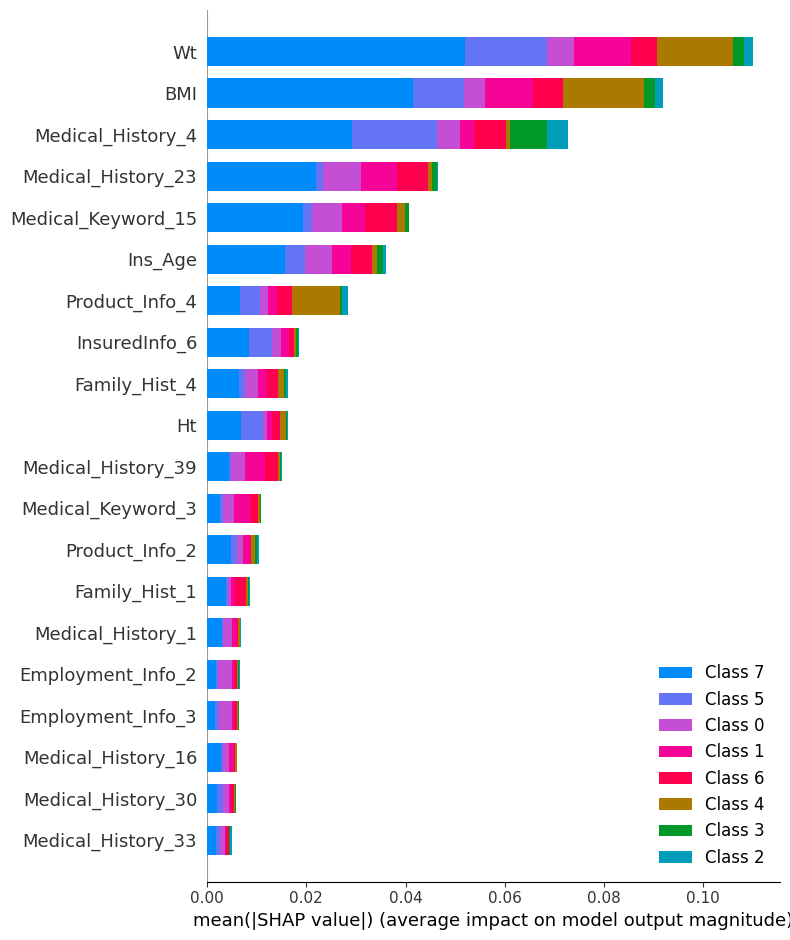

In [75]:
# Interpretting the model using shaply
X_shap=X_train

rf_explainer = shap.TreeExplainer(rf_optimal_model)
rf_shap_values = rf_explainer.shap_values(X_shap)
shap.summary_plot(rf_shap_values, X_shap, plot_type="bar")

In [76]:
top_vars =['Wt','BMI','Medical_History_4','Medical_Keyword_15','Product_Info_4','Medical_History_23',	'Ins_Age']

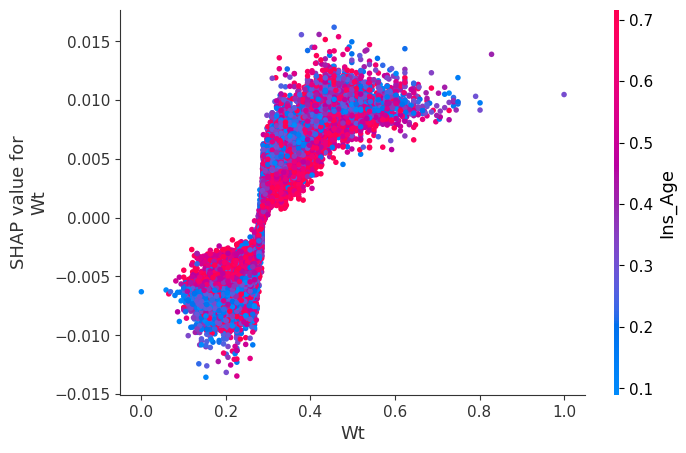

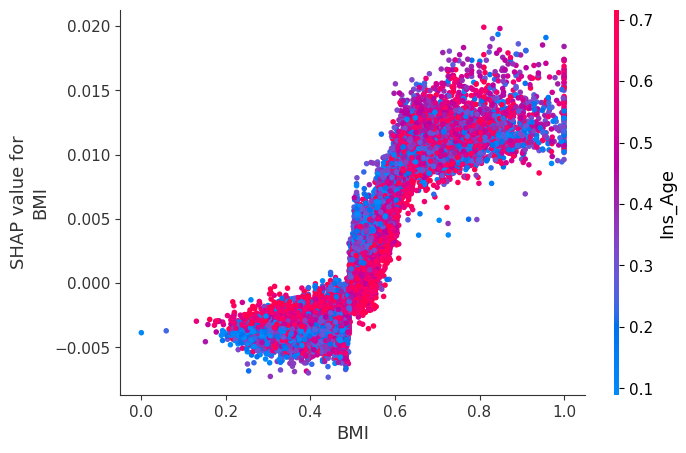

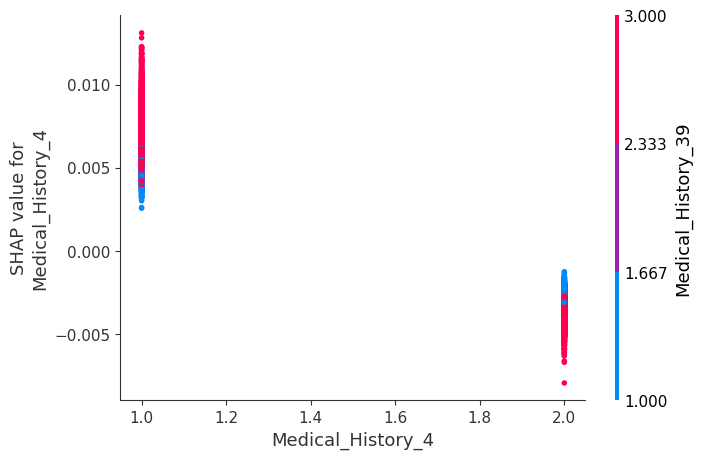

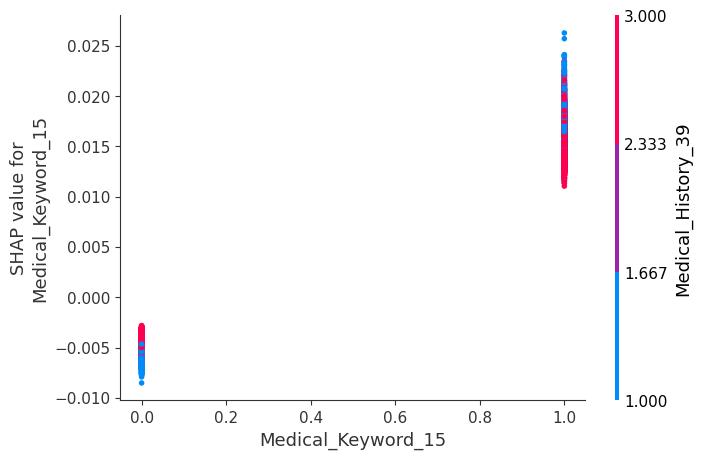

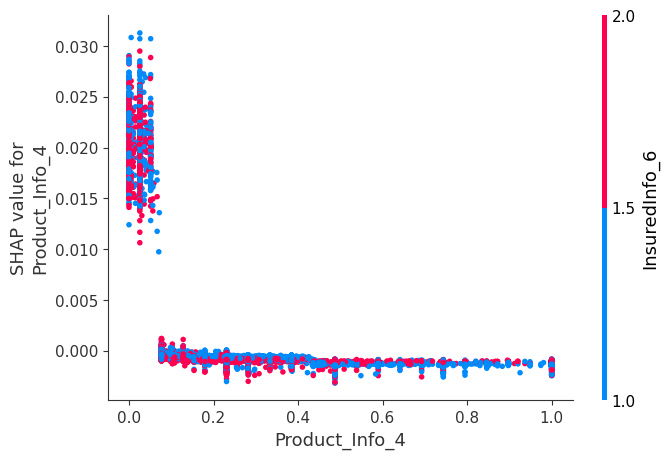

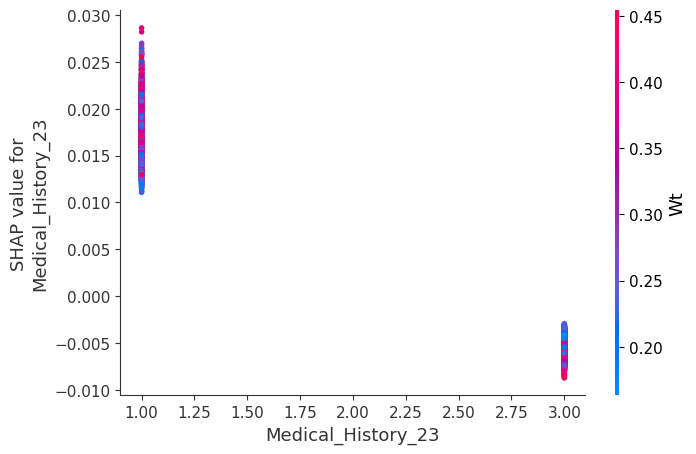

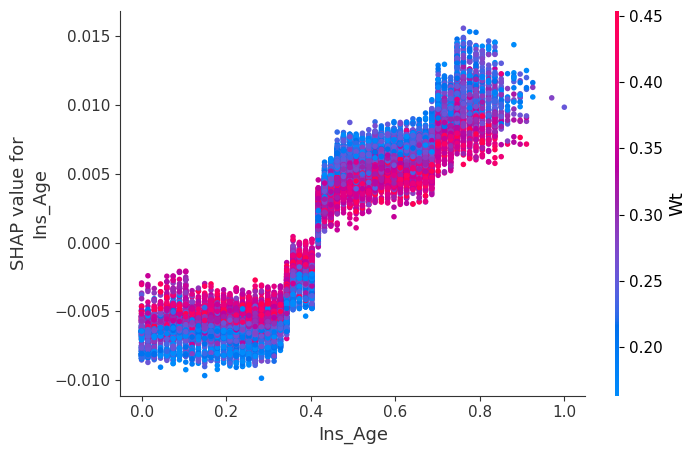

In [77]:
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, rf_shap_values[0], X_train)

##physical_data

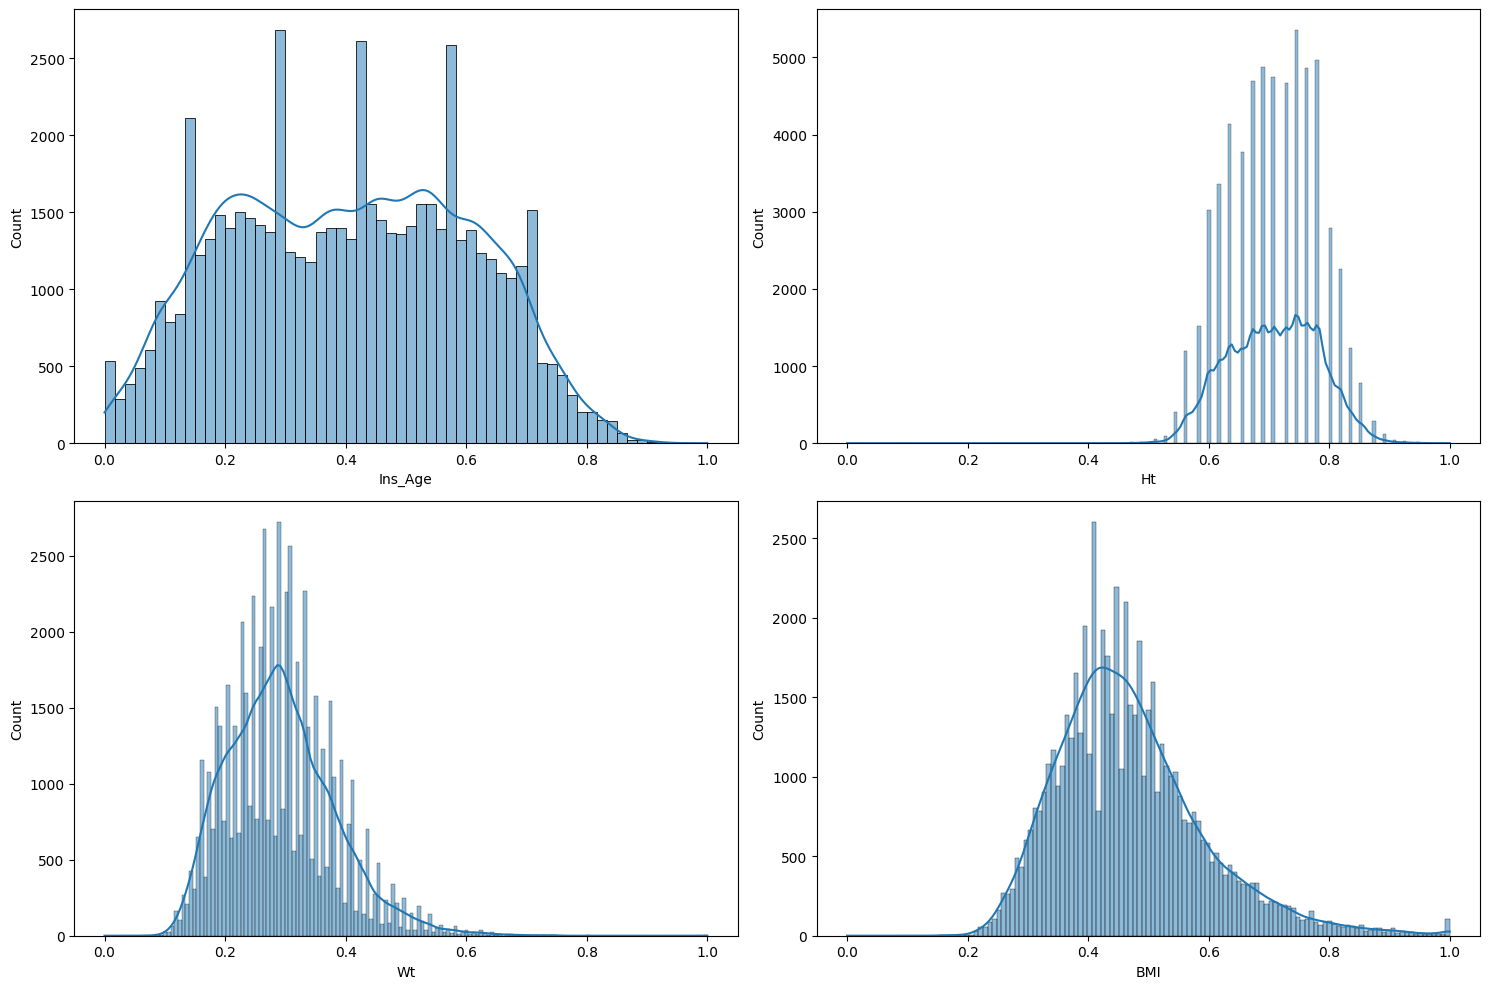

In [ ]:
physical_data = ['Ins_Age', 'Ht', 'Wt', 'BMI']
plt.figure(figsize=(15, 10))
for idx, col in enumerate(physical_data, 1):
    plt.subplot(2, 2, idx)
    sns.histplot( x=col,data=df, kde=True)
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [ ]:
df[physical_data].corr()

,Ins_Age,Ht,Wt,BMI
Ins_Age,1.000000,0.008419,0.110366,0.137076
Ht,0.008419,1.000000,0.610425,0.123125
Wt,0.110366,0.610425,1.000000,0.854083
BMI,0.137076,0.123125,0.854083,1.000000


In [ ]:
df.drop(['Ht','Wt'],axis=1,inplace=True)
#based on domain analysis

KeyError: ignored

###general function to create a list of column names

In [ ]:
def func(string, num):
    ans = []
    for i in range(1, num + 1):
        ans.append(f'{string}_{i}')
    return ans

In [ ]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Modified_Response
0,1,17,10,0.076923,2,1,1,0.641791,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3
1,1,1,26,0.076923,2,3,1,0.059701,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
2,1,19,26,0.076923,2,3,1,0.029851,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3
3,1,18,10,0.487179,2,3,1,0.164179,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3
4,1,16,26,0.230769,2,3,1,0.417910,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3


#reducing dimensionality

In [ ]:
Medical_Keywords = func('Medical_Keyword',48 )
print(Medical_Keywords)
#created a list of all medical keyword columns

['Medical_Keyword_1', 'Medical_Keyword_2', 'Medical_Keyword_3', 'Medical_Keyword_4', 'Medical_Keyword_5', 'Medical_Keyword_6', 'Medical_Keyword_7', 'Medical_Keyword_8', 'Medical_Keyword_9', 'Medical_Keyword_10', 'Medical_Keyword_11', 'Medical_Keyword_12', 'Medical_Keyword_13', 'Medical_Keyword_14', 'Medical_Keyword_15', 'Medical_Keyword_16', 'Medical_Keyword_17', 'Medical_Keyword_18', 'Medical_Keyword_19', 'Medical_Keyword_20', 'Medical_Keyword_21', 'Medical_Keyword_22', 'Medical_Keyword_23', 'Medical_Keyword_24', 'Medical_Keyword_25', 'Medical_Keyword_26', 'Medical_Keyword_27', 'Medical_Keyword_28', 'Medical_Keyword_29', 'Medical_Keyword_30', 'Medical_Keyword_31', 'Medical_Keyword_32', 'Medical_Keyword_33', 'Medical_Keyword_34', 'Medical_Keyword_35', 'Medical_Keyword_36', 'Medical_Keyword_37', 'Medical_Keyword_38', 'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_4

In [ ]:
df.shape

(59381, 118)

###Merging Medical_Keyword Columns

In [ ]:
# df['Medical_Words']=df['Medical']
df['Medical_Words'] = df[Medical_Keywords].sum(axis=1)

In [ ]:
df.shape
df_merged=df.drop(Medical_Keywords,axis=1)
df_merged.shape

(59381, 71)

In [ ]:
df_merged['Medical_Words'].value_counts()

0     23519
1     16096
2      9464
3      5235
4      2726
5      1311
6       587
7       273
8        92
9        52
10       19
11        3
14        1
13        1
12        1
16        1
Name: Medical_Words, dtype: int64

In [ ]:
df_merged['Medical_Words'].describe()

count    59381.000000
mean         1.264765
std          1.480236
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Medical_Words, dtype: float64

##One hot Encoding Medical_History

In [ ]:
df['Medical_History_12'].unique()

array([2, 3, 1])

In [ ]:
Medical_Histories = func('Medical_History',41)
to_remove=['Medical_History_1','Medical_History_2','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
Medical_Histories = [item for item in Medical_Histories if item not in to_remove]

In [ ]:
df_merged.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Response,Modified_Response,Medical_Words
0,1,17,10,0.076923,2,1,1,0.641791,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,8,3,0
1,1,1,26,0.076923,2,3,1,0.059701,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,4,1,0
2,1,19,26,0.076923,2,3,1,0.029851,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,8,3,0
3,1,18,10,0.487179,2,3,1,0.164179,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,8,3,1
4,1,16,26,0.230769,2,3,1,0.417910,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,8,3,0


In [ ]:
from sklearn.decomposition import PCA
columns_for_pca = Medical_Histories
df_pca_input = df_merged[columns_for_pca]

# Apply one-hot encoding to categorical columns
df_pca_encoded = pd.get_dummies(df_pca_input, columns=columns_for_pca)

# Apply PCA to reduce dimensionality to 1 column
pca = PCA(n_components=1)
df_merged['PCA_Component'] = pca.fit_transform(df_pca_encoded)

# Drop the columns that underwent PCA
df_encoded=df_merged.drop(columns=columns_for_pca)





In [ ]:
df_encoded.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Response,Modified_Response,Medical_Words,PCA_Component
0,1,17,10,0.076923,2,1,1,0.641791,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,8,3,0,-0.802699
1,1,1,26,0.076923,2,3,1,0.059701,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,4,1,0,-0.529944
2,1,19,26,0.076923,2,3,1,0.029851,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,8,3,0,2.157844
3,1,18,10,0.487179,2,3,1,0.164179,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,8,3,1,-0.276400
4,1,16,26,0.230769,2,3,1,0.417910,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,8,3,0,2.157844


In [ ]:
df_encoded.shape

(59381, 37)

In [ ]:

#Rest of the columns are with non-paramteric nature. So we can take all the rest columns.
#And can select the features again

#Normalization/Scaling

#1

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_encoded.drop(['Modified_Response','Response'],axis=1)
y = df_encoded['Modified_Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier - you can try other classifiers as well
# model = RandomForestClassifier(n_estimators=100, random_state=10)


model = RandomForestClassifier(
    n_estimators=500,
    max_features='sqrt',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Train the model
# model.fit(X_train, y_train)



# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6307148269765093
